In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [247]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [248]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [249]:
df = pd.DataFrame(data.data ,columns= data.feature_names)

In [250]:
df['price'] = data.target

In [251]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [252]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [253]:
df = df.sample(frac=
              0.20)

In [254]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
5977,3.0735,23.0,5.334589,1.040693,3205.0,2.415222,34.11,-117.78,2.123
13116,3.8897,14.0,6.097222,1.071759,1402.0,3.245370,38.36,-121.20,1.757
7770,4.0517,36.0,5.380597,1.011194,990.0,3.694030,33.91,-118.09,1.622
13399,4.8283,4.0,6.795894,1.053372,5804.0,3.404106,34.13,-117.42,1.419
9539,2.6058,40.0,3.885714,0.914286,785.0,4.485714,37.39,-120.71,0.727
...,...,...,...,...,...,...,...,...,...
12047,3.1312,22.0,4.575321,1.068910,2453.0,3.931090,33.88,-117.53,0.910
9787,2.4881,29.0,6.101911,1.229299,1019.0,3.245223,36.06,-120.79,0.875
2404,1.7292,33.0,4.513678,1.136778,1544.0,4.693009,36.62,-119.31,0.520
19313,5.1512,28.0,6.267717,1.146982,1015.0,2.664042,38.42,-122.89,2.683


In [255]:
#to visualise the tree, selecting only 20 percent of the data, 
#feel free to comment this line to train the model

In [256]:
df.shape

(4128, 9)

In [257]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [258]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5977,3.0735,23.0,5.334589,1.040693,3205.0,2.415222,34.11,-117.78
13116,3.8897,14.0,6.097222,1.071759,1402.0,3.245370,38.36,-121.20
7770,4.0517,36.0,5.380597,1.011194,990.0,3.694030,33.91,-118.09
13399,4.8283,4.0,6.795894,1.053372,5804.0,3.404106,34.13,-117.42
9539,2.6058,40.0,3.885714,0.914286,785.0,4.485714,37.39,-120.71
...,...,...,...,...,...,...,...,...
12047,3.1312,22.0,4.575321,1.068910,2453.0,3.931090,33.88,-117.53
9787,2.4881,29.0,6.101911,1.229299,1019.0,3.245223,36.06,-120.79
2404,1.7292,33.0,4.513678,1.136778,1544.0,4.693009,36.62,-119.31
19313,5.1512,28.0,6.267717,1.146982,1015.0,2.664042,38.42,-122.89


In [259]:
y

5977     2.123
13116    1.757
7770     1.622
13399    1.419
9539     0.727
         ...  
12047    0.910
9787     0.875
2404     0.520
19313    2.683
10676    4.664
Name: price, Length: 4128, dtype: float64

In [260]:
from sklearn.model_selection import train_test_split

In [261]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [262]:
from sklearn.tree import DecisionTreeRegressor

In [263]:
pedd = DecisionTreeRegressor()

In [264]:
pedd.fit(X_train,y_train)

DecisionTreeRegressor()

In [265]:
y_pred = pedd.predict(X_test)

In [266]:
y_pred

array([3.459  , 1.192  , 3.159  , 2.61   , 3.525  , 2.247  , 1.283  ,
       1.519  , 1.54   , 0.476  , 3.541  , 3.36   , 1.161  , 1.602  ,
       1.556  , 1.271  , 1.281  , 0.898  , 1.36   , 3.75   , 3.839  ,
       2.157  , 1.085  , 5.00001, 3.5    , 2.118  , 1.125  , 1.44   ,
       2.025  , 0.48   , 0.928  , 3.86   , 2.042  , 2.907  , 3.179  ,
       2.054  , 1.194  , 3.562  , 1.375  , 2.625  , 1.425  , 3.704  ,
       2.209  , 2.159  , 2.5    , 2.043  , 2.148  , 3.136  , 1.184  ,
       2.528  , 2.006  , 1.468  , 0.682  , 1.918  , 1.782  , 2.156  ,
       2.375  , 2.583  , 2.15   , 1.011  , 0.558  , 1.844  , 0.561  ,
       2.548  , 1.097  , 0.706  , 0.903  , 2.293  , 2.065  , 2.054  ,
       2.78   , 1.696  , 1.331  , 2.921  , 3.875  , 1.03   , 2.438  ,
       1.833  , 0.794  , 2.083  , 1.839  , 1.432  , 2.547  , 3.24   ,
       2.657  , 1.008  , 2.228  , 1.875  , 3.016  , 1.519  , 0.852  ,
       1.518  , 1.813  , 1.438  , 3.254  , 1.625  , 2.436  , 0.86   ,
       1.73   , 1.89

In [267]:
from sklearn.metrics import mean_squared_error , r2_score

In [268]:
r2_score(y_test,y_pred)

0.5041984925265082

In [269]:
mean_squared_error(y_test,y_pred)

0.6233845899069007

In [270]:
# HYPERPARAMETER TUNNING 

In [271]:
params = {
    'criterion': ["squared_error", "absolute_error", "friedman_mse", 'poisson'],
    'splitter': ["best", "random"],
    'max_depth': [1, 2, 3, 4, 10],
    'max_features':[None, 'sqrt', 'log2']
}

In [272]:
pedd

DecisionTreeRegressor()

In [273]:
from sklearn.model_selection import  GridSearchCV

In [274]:
grid = GridSearchCV(pedd , param_grid=params , cv = 5 , scoring='neg_mean_squared_error' , verbose = 3)

In [275]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END criterion=squared_error, max_depth=1, max_features=None, splitter=best;, score=-0.939 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=1, max_features=None, splitter=best;, score=-1.036 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=1, max_features=None, splitter=best;, score=-0.965 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=1, max_features=None, splitter=best;, score=-0.907 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=1, max_features=None, splitter=best;, score=-0.890 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=1, max_features=None, splitter=random;, score=-1.296 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=1, max_features=None, splitter=random;, score=-1.223 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=1, max_features=None, splitter=random;, score=-0.933 total 

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [276]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=10, splitter='random')

In [277]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': None,
 'splitter': 'random'}

In [278]:
y_ppred = grid.best_estimator_.predict(X_test)

In [279]:
r2_score(y_test, y_ppred)

0.45844845813915247

In [280]:
from sklearn import tree

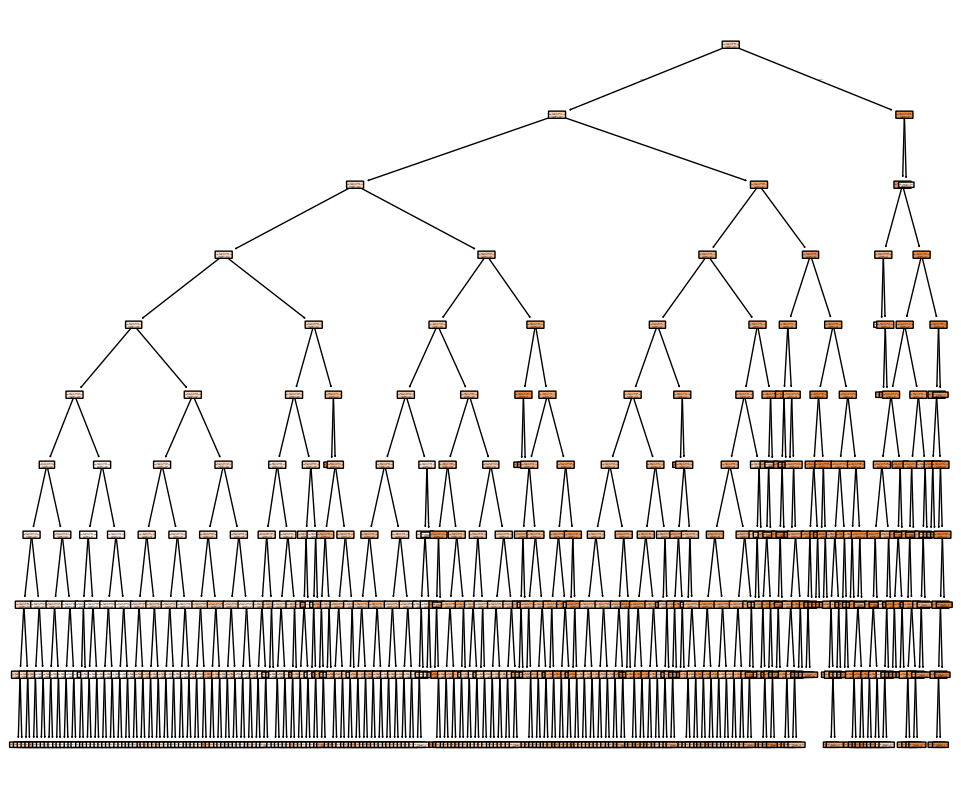

In [281]:
plt.figure(figsize=(12,10))
tree.plot_tree(grid.best_estimator_ , filled = True , rounded= True)
plt.show()